In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2

# Classification Using Linear Regression

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

In [3]:
print(np.shape(x))

(200, 2)


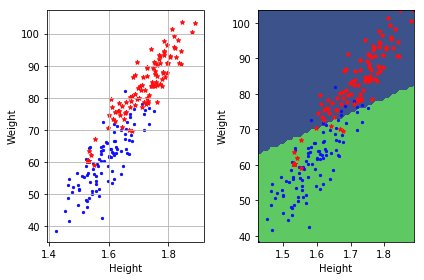

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

# Logistic Regression

In [5]:
def sigmoid(t):
    """apply sigmoid function on t."""
    
    return np.exp(t) / (1 + np.exp(t))

In [6]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    pred = sigmoid(tx.dot(w))
    
    return - y.T.dot(np.log(pred)) - (1 - y).T.dot(np.log(1 - pred))

In [7]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""

    return tx.T.dot(sigmoid(tx.dot(w)) - y)

### Using Gradient Descent

In [8]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    
    w = w - gamma * grad

    return loss, w

Current iteration=0, the loss=[[138.62943611]]
Current iteration=100, the loss=[[43.46403231]]
Current iteration=200, the loss=[[41.54589281]]
Current iteration=300, the loss=[[41.09863897]]
Current iteration=400, the loss=[[40.96487064]]
Current iteration=500, the loss=[[40.92008946]]
Current iteration=600, the loss=[[40.90418744]]
Current iteration=700, the loss=[[40.89834995]]
Current iteration=800, the loss=[[40.89616497]]
Current iteration=900, the loss=[[40.89533753]]
Current iteration=1000, the loss=[[40.89502196]]
Current iteration=1100, the loss=[[40.89490109]]
Current iteration=1200, the loss=[[40.89485466]]
Current iteration=1300, the loss=[[40.8948368]]
Current iteration=1400, the loss=[[40.89482992]]
Current iteration=1500, the loss=[[40.89482727]]
The loss=[[40.89482664]]


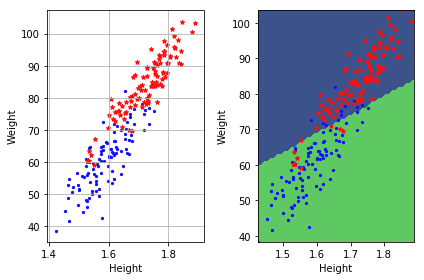

In [9]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

In [10]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    pred = sigmoid(tx.dot(w))
    S = np.diag(np.multiply(pred, 1-pred).transpose()[0])
    
    return tx.T.dot(S.dot(tx))

In [11]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    hess = calculate_hessian(y, tx, w)
    
    return loss, grad, hess

### Using Newton method

In [12]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    Return the loss and updated w.
    """   
    loss, grad, hess = logistic_regression(y, tx, w)
    w -= gamma * np.linalg.solve(hess, grad)
    
    return loss, w

Current iteration=0, the loss=[[138.62943611]]
Current iteration=1, the loss=[[63.41155374]]
Current iteration=2, the loss=[[47.3045862]]
Current iteration=3, the loss=[[41.99746742]]
Current iteration=4, the loss=[[40.95639864]]
Current iteration=5, the loss=[[40.89511994]]
Current iteration=6, the loss=[[40.89482562]]
Current iteration=7, the loss=[[40.89482561]]
The loss=[[40.89482561]]


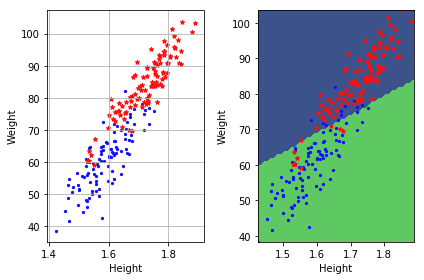

In [13]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 1
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression

In [14]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w) + lambda_ * w.T.dot(w)
    grad = calculate_gradient(y, tx, w) + 2 * lambda_ * w
    hess = calculate_hessian(y, tx, w) + lambda_

    return loss, grad, hess

In [15]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, grad, _ = penalized_logistic_regression(y, tx, w, lambda_)
    w -= gamma * grad

    return loss, w

Current iteration=0, the loss=[[138.62943611]]
Current iteration=100, the loss=[[46.07607269]]
Current iteration=200, the loss=[[45.13699081]]
Current iteration=300, the loss=[[45.0281699]]
Current iteration=400, the loss=[[45.01325693]]
Current iteration=500, the loss=[[45.01109478]]
Current iteration=600, the loss=[[45.01077474]]
Current iteration=700, the loss=[[45.010727]]
Current iteration=800, the loss=[[45.01071985]]
The loss=[[41.80587009]]


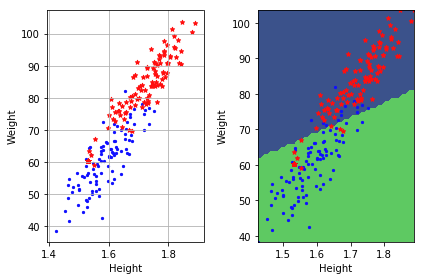

In [16]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)